In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# Describe

In [3]:
df.shape

(344, 7)

In [4]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# EDA

# Feature Engineering

In [8]:
#dropping the missing values
df=df.dropna()

In [9]:
#shape of data after dropping missing values
df.shape

(334, 7)

# X and Y


In [10]:
X=pd.get_dummies(df.drop('species',axis=1),drop_first=True)
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,1,0,1
...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,0
340,46.8,14.3,215.0,4850.0,0,0,1,0
341,50.4,15.7,222.0,5750.0,0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,1,0


In [11]:
y=df['species']

# Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,random_state=40)

# Modelling

In [13]:
#import Classifier
from sklearn.ensemble import RandomForestClassifier

In [14]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  P

In [16]:
#save with 'model name' with default parameters
model=RandomForestClassifier(n_estimators=10,random_state=101)

In [17]:
#Fit the model
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [18]:
#predict on X_test & y_pred_test
y_pred_test= model.predict(X_test)

In [19]:
#Predict on X_train & y_pred_train
y_pred_train=model.predict(X_train)

# Evaluation

In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_train,y_train))
print(accuracy_score(y_pred_test,y_test))

1.0
1.0


In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_test)

array([[42,  0,  0],
       [ 0, 23,  0],
       [ 0,  0, 36]], dtype=int64)

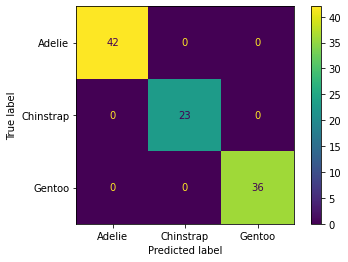

In [22]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test)
plt.show()

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        42
   Chinstrap       1.00      1.00      1.00        23
      Gentoo       1.00      1.00      1.00        36

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



# Feature Importance 

In [24]:
model.feature_importances_

array([0.29252811, 0.09866161, 0.19123608, 0.2106169 , 0.15810741,
       0.04203849, 0.00198916, 0.00482223])

# Choosing correct number of trees

In [26]:
#Lets plot out accuracy vs Number of Estimators

test_acc=[]
train_acc=[]

for n in range(1,40):
    #use n random trees
    model=RandomForestClassifier(n_estimators=n,max_features='auto',bootstrap=True)
    model.fit(X_train,y_train)
    
    train_preds=model.predict(X_train)
    train_acc.append(accuracy_score(train_preds,y_train))
    
    test_preds=model.predict(X_test)
    test_acc.append(accuracy_score(test_preds,y_test))

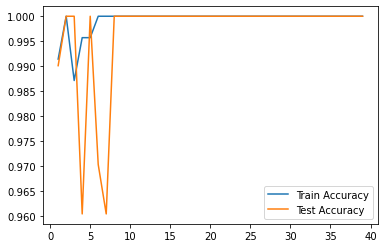

In [27]:
#Lets plot out accuracy vs Number of Estimators
plt.plot(range(1,40),train_acc,label='Train Accuracy')
plt.plot(range(1,40),test_acc,label='Test Accuracy')


plt.legend()
plt.show()

# Random Forest -HyperParameter Exploration

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid={'n_estimators':[26,64,100,128,200],'max_features':[2,3,4]}

In [31]:
rfc=RandomForestClassifier()
grid=GridSearchCV(rfc,param_grid,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3, 4],
                         'n_estimators': [26, 64, 100, 128, 200]},
             scoring='accuracy')

In [32]:
grid.best_params_

{'max_features': 3, 'n_estimators': 26}

In [33]:
predictions=grid.predict(X_test)

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        42
   Chinstrap       1.00      1.00      1.00        23
      Gentoo       1.00      1.00      1.00        36

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



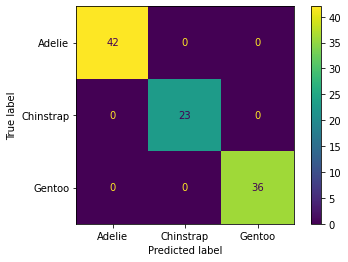

In [35]:
plot_confusion_matrix(grid,X_test,y_test)